In [2]:
import random
import numpy as np

def generate_random_set(num_elements, max_subset_size):
    universe = list(range(1, num_elements + 1))
    universe_real = universe
    subsets = []

    for i in range(num_elements**2):
      subsets.append(random.choices(universe,k=int(random.uniform(1,num_elements//2))))

    return universe,subsets

# Example usage:
num_elements = 10
max_subset_size = 5

universe, subsets = generate_random_set(num_elements, max_subset_size)

print("Generated Universe:", universe)
print("Generated Subsets:", sorted(subsets))


Generated Universe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Generated Subsets: [[1], [1], [1], [1, 1], [1, 2], [1, 3], [1, 3, 4], [1, 4, 2, 8], [1, 5, 3], [1, 7], [1, 7, 3], [1, 7, 9], [1, 8], [2], [2], [2, 5], [2, 5, 3], [2, 5, 10], [3], [3], [3, 1, 5, 7], [3, 2, 2, 2], [3, 2, 3], [3, 4], [3, 4, 9], [3, 4, 10], [3, 5], [3, 8, 10, 2], [3, 9, 8, 5], [3, 10], [4], [4], [4], [4], [4, 1, 3], [4, 3, 2], [4, 6, 2, 6], [4, 9], [4, 10], [5], [5], [5], [5, 2], [5, 5, 9, 10], [5, 6], [5, 7, 3], [6], [6], [6], [6, 1, 1, 9], [6, 2], [6, 2], [6, 4], [6, 5], [6, 5], [6, 7], [6, 7, 10], [6, 8, 7, 4], [6, 9], [6, 9, 4, 4], [6, 10, 4], [7], [7, 1], [7, 2, 8, 6], [7, 9], [7, 10, 4], [8], [8], [8], [8], [8, 1, 4], [8, 1, 5, 8], [8, 4], [8, 4, 4, 1], [8, 5, 3], [8, 8, 1, 8], [8, 8, 5], [8, 9], [9], [9], [9], [9, 2, 4], [9, 2, 6, 3], [9, 4, 8], [9, 5, 5], [9, 5, 10], [9, 6, 6, 2], [9, 7, 9, 9], [9, 9, 6], [10], [10], [10, 1, 8], [10, 3], [10, 5, 3, 2], [10, 5, 4, 2], [10, 6, 1], [10, 8, 6, 5], [10, 9], [10, 9, 2],

In [3]:
def findUniverseSet(universe,array):
  org_array = array[:]
  universe_len = len(universe)
  universe_base = universe[:]
  array = sorted(array)
  set_values = []
  values = []

  iter = 0
  max_sum = sum(universe_base) / len(universe_base)
  rec = False
  for _ in range(1000):
    if _ % 100 == 0 and len(values) > 3:
      temp_array = [el for el in universe_base if el not in values]
      if len(temp_array) != 0:
        max_sum = min(temp_array)
      else:
        return set_values
    arr_el = [i for i in array[iter] if i not in values]
    x = sum(arr_el)
    if x >= max_sum:
      max_sum = x
      values.extend(array[iter])
      if set(values) == universe_base:
        return set_values
      set_values.append(array[iter])
      array.remove(array[iter])

    iter += 1
    iter = iter % len(array)
    universe = [i for i in universe if i not in values]
    if sorted(values) == sorted(universe_base):
      print('EQUAL')
      return set_values
  print('ITERATION OVER')
  return set_values






In [4]:
def backtrack_set_cover(universe, subsets):
    def backtrack(selected_subsets, remaining_elements):
        if not remaining_elements:
            return selected_subsets

        for subset in subsets:
          subset = set(subset)
          if subset.intersection(remaining_elements):
              result = backtrack(selected_subsets + [subset], remaining_elements - subset)
              if result:
                  return result

        return None

    return backtrack([], set(universe))

# Example usage:
universe = {1, 2, 3, 4, 5}
subsets = [{1, 2}, {2, 3}, {3, 4}, {4, 5}]
result = backtrack_set_cover(universe, subsets)
print(result)


[{1, 2}, {2, 3}, {3, 4}, {4, 5}]


In [5]:
# Example usage:
num_elements = 10
max_subset_size = 5

# Example usage:
num_elements = 10
max_subset_size = 5

universe, subsets = generate_random_set(num_elements, max_subset_size)

print("Generated Universe:", universe)
print("Generated Subsets:", subsets)

print(findUniverseSet(universe,subsets))
print(backtrack_set_cover(universe,subsets))

Generated Universe: [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
Generated Subsets: [[1, 4, 6, 7], [7, 9, 10, 7], [7, 3, 6, 5], [3], [1], [4, 1], [4, 3, 5, 7], [7, 1], [4, 1, 4], [10], [4], [10, 2, 2, 10], [3, 10, 8, 7], [4, 9, 5], [9, 8, 6, 1], [6, 4, 10, 9], [5], [8, 10], [8], [6, 1, 3], [7], [5, 10, 5], [2, 7, 4], [5], [10, 7], [7], [1], [8, 9, 4, 3], [6, 8, 5], [8, 6, 2], [5, 8, 4], [3, 6], [9], [2, 10, 7], [6, 2, 4, 7], [4], [3, 4, 1, 3], [3, 7], [5, 1, 2], [9, 2, 1], [10, 1, 4, 8], [6, 6, 3, 1], [9], [10], [4], [1, 7, 3], [1], [5, 5, 10], [4, 7, 4, 2], [6, 5, 5], [4, 10, 4, 3], [6], [10, 4, 2, 4], [7, 5, 4], [9, 6, 7, 2], [8, 8], [5, 10, 3, 3], [8], [2], [7], [6], [6, 9, 9, 7], [8], [5, 10, 8, 6], [6, 9, 2], [9], [6, 4, 3], [1, 10, 6, 6], [1, 4], [3, 3], [5, 1], [7, 1, 2], [4, 1, 3], [7, 7, 3], [7], [2, 5, 4], [2], [2], [8, 8, 6, 5], [8, 5, 3, 1], [4, 8], [10], [8, 6, 4, 3], [2, 2, 5, 3], [4, 10, 3, 1], [5, 6, 7, 6], [7, 6, 5, 1], [10, 7], [7, 9, 2], [4, 2], [1, 4, 4, 9], [1, 9, 3], [1], [4, 

In [6]:
def set_cover_greedy(universe, subsets):
    elements = set(universe)
    covered_elements = set()
    selected_subsets = []

    while elements:
        best_subset = max(subsets, key=lambda s: len(set(s) & elements))
        selected_subsets.append(best_subset)
        covered_elements |= set(best_subset)
        elements -= set(best_subset)

    return selected_subsets
# Example usage:
universe = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
subsets = [[1, 2, 3], [4, 5, 6], [7, 8, 9, 10]]

result = set_cover_greedy(universe, subsets)
print("Selected Subsets:", result)


Selected Subsets: [[7, 8, 9, 10], [1, 2, 3], [4, 5, 6]]


In [7]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_times = []
maxVal_times = []
backstrack_algo_times = []
for _ in range(2,100):
    # Example usage:
    num_elements = _+10
    max_subset_size = _+5

    universe, subsets = generate_random_set(num_elements, max_subset_size)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_times.append(greedy_set_time)
    maxVal_times.append(maxVal_time)
    backstrack_algo_times.append(backstrack_algo_time)

3 6 7
3 7 7
3 6 8
3 6 11
3 6 7
3 6 6
3 8 6
3 6 10
3 5 7
3 6 10
3 8 9
3 6 9
3 8 10
3 4 8
3 7 11
3 7 9
3 8 9
3 7 8
3 8 13
3 7 10
3 7 10
3 7 8
3 8 11
3 9 10
3 7 11
3 8 12
3 10 11
3 10 10
3 8 8
3 11 12
3 11 10
3 9 11
3 12 9
3 9 12
3 10 13
3 8 10
3 11 9
3 12 12
3 10 14
3 11 11
3 10 10
3 11 12
3 10 11
3 11 13
3 9 9
3 9 12
3 8 14
3 8 14
3 8 18
3 9 10
3 10 9
3 9 11
3 10 12
3 11 14
3 11 10
3 9 15
3 11 14
3 9 15
3 12 12
3 10 17
3 10 18
3 11 13
3 9 15
3 11 12
3 10 19
3 12 12
3 11 14
3 11 13
3 10 18
3 10 15
3 12 15
3 11 17
3 10 12
3 10 13
3 7 14
3 9 17
3 10 12
3 11 12
3 9 14
3 10 11
3 12 18
3 11 14
3 10 13
3 11 15
3 11 15
3 10 14
3 9 15
3 12 17
3 10 12
3 11 15
3 10 19
3 11 17
3 13 13
3 9 14
3 13 16
3 9 13
3 13 17
3 11 15


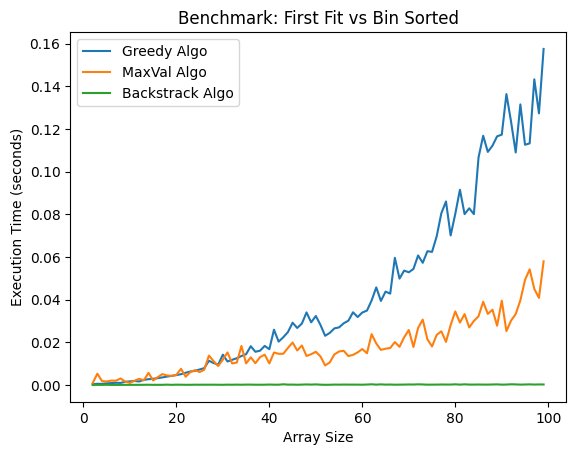

In [8]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_times, label='Greedy Algo')
plt.plot(sizes, maxVal_times, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_times, label='Backstrack Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()

In [14]:
import time
import matplotlib.pyplot as plt

sizes = []
greedy_algo_results = []
maxVal_results = []
backstrack_algo_results = []
for _ in range(2,100):
    # Example usage:
    num_elements = _+10
    max_subset_size = _+5

    universe, subsets = generate_random_set(num_elements, max_subset_size)

    start_time = time.time()
    result1 = set_cover_greedy(universe, subsets)
    greedy_set_time = time.time() - start_time

    start_time = time.time()
    result2 = findUniverseSet(universe, subsets)
    maxVal_time = time.time() - start_time

    start_time = time.time()
    result3 = backtrack_set_cover(universe, subsets)
    backstrack_algo_time = time.time() - start_time



    print(len(result),len(result2),len(result3))

    sizes.append(_)
    greedy_algo_results.append(len(result1))
    maxVal_results.append(len(result2))
    backstrack_algo_results.append(len(result3))

3 6 11
3 5 10
3 5 7
3 6 9
3 6 10
3 6 8
3 6 10
3 5 11
3 8 7
3 7 7
3 6 9
3 7 12
3 8 10
3 6 11
3 8 11
3 7 7
3 8 10
3 8 12
3 8 12
3 8 11
3 8 11
3 8 9
3 6 11
3 8 8
3 7 15
3 8 9
3 9 11
3 7 12
3 7 10
3 8 12
3 8 10
3 9 12
3 9 8
3 9 12
3 10 14
3 11 10
3 9 14
3 8 12
3 9 10
3 9 14
3 9 11
3 10 12
3 11 9
3 9 10
3 9 10
3 9 16
3 8 11
3 9 13
3 9 16
3 8 12
3 10 14
3 9 13
3 9 11
3 12 13
3 9 13
3 11 13
3 10 13
3 7 13
3 8 12
3 9 9
3 9 12
3 8 13
3 9 11
3 11 15
3 10 11
3 9 15
3 10 11
3 9 14
3 10 9
3 8 14
3 9 15
3 11 12
3 10 13
3 11 14
3 13 14
3 11 12
3 11 12
3 10 17
3 13 12
3 10 14
3 9 13
3 9 16
3 11 13
3 11 13
3 10 17
3 12 15
3 11 15
3 11 14
3 12 14
3 12 12
3 12 15
3 10 14
3 8 17
3 9 16
3 11 13
3 12 16
3 12 13
3 10 14


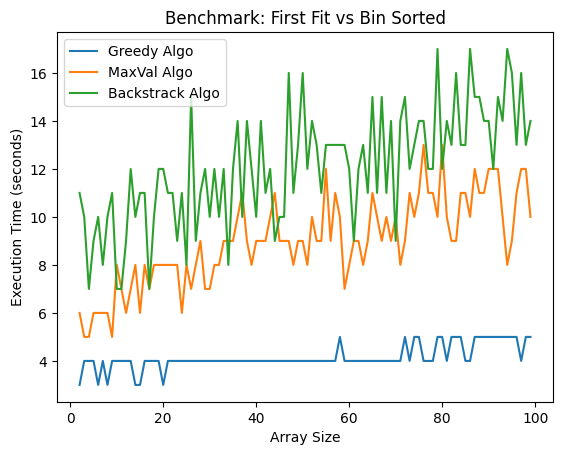

In [15]:
import matplotlib.pyplot as plt

# Plot the results
plt.plot(sizes, greedy_algo_results, label='Greedy Algo')
plt.plot(sizes, maxVal_results, label='MaxVal Algo')
plt.plot(sizes, backstrack_algo_results, label='Backstrack Algo')
plt.xlabel('Array Size')
plt.ylabel('Execution Time (seconds)')
plt.legend()
plt.title('Benchmark: First Fit vs Bin Sorted')
plt.show()